In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Load the dataset
data = pd.read_csv('data/Shek_Kong.csv')

data

,location,year,month,day,mean_windspeed,wind_direction,mean_tempurature,humidity,rainfall,duration,color
0,Shek Kong,2019,1,1,8.5,60,12.1,69,0,0,Green
1,Shek Kong,2019,1,2,8.5,70,13.2,67,0.5,0,Green
2,Shek Kong,2019,1,3,7.9,70,13.7,82,0,0,Green
3,Shek Kong,2019,1,4,5,90,19.1,81,0,0,Green
4,Shek Kong,2019,1,5,1,290,19.2,88,0,0,Green
...,...,...,...,...,...,...,...,...,...,...,...
1912,Shek Kong,2024,3,27,16.1,90,23,80,0,0,Green
1913,Shek Kong,2024,3,28,4.4,80,24.8,80,0,0,Green
1914,Shek Kong,2024,3,29,3.8,270,25.8,79,0,0,Green
1915,Shek Kong,2024,3,30,5.6,180,26.6,78,0,0,Green


In [4]:
# Data Preprocessing
# Handle missing values, encode categorical variables, scale numerical features if needed

# Check for null values
null_values = data.isnull()
print("Null Values:")
print(null_values)
print("\nCount of Null Values in Each Column:")
print(null_values.sum())

Null Values:
      location   year  month    day  mean_windspeed  wind_direction  \
0        False  False  False  False           False           False   
1        False  False  False  False           False           False   
2        False  False  False  False           False           False   
3        False  False  False  False           False           False   
4        False  False  False  False           False           False   
...        ...    ...    ...    ...             ...             ...   
1912     False  False  False  False           False           False   
1913     False  False  False  False           False           False   
1914     False  False  False  False           False           False   
1915     False  False  False  False           False           False   
1916     False  False  False  False           False           False   

      mean_tempurature  humidity  rainfall  duration  color  
0                False     False     False     False  False  
1         

In [5]:
df = pd.DataFrame(data)

# Check data types of columns
column_types = df.dtypes
print("Data Types of Columns:")
print(column_types)

Data Types of Columns:
location            object
year                 int64
month                int64
day                  int64
mean_windspeed      object
wind_direction      object
mean_tempurature    object
humidity            object
rainfall            object
duration             int64
color               object
dtype: object


In [6]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Display numeric columns
print("Numeric Columns:")
print(numeric_columns)

Numeric Columns:
      year  month  day  duration
0     2019      1    1         0
1     2019      1    2         0
2     2019      1    3         0
3     2019      1    4         0
4     2019      1    5         0
...    ...    ...  ...       ...
1912  2024      3   27         0
1913  2024      3   28         0
1914  2024      3   29         0
1915  2024      3   30         0
1916  2024      3   31         0

[1917 rows x 4 columns]


In [7]:
# Convert 'Value' column to numeric with coerce to turn strings into NaN
numeric_values = pd.to_numeric(df['rainfall'], errors='coerce')
num_strings = numeric_values.isna().sum()

temp_numeric_values = pd.to_numeric(df['mean_tempurature'], errors='coerce')
temp_num_strings = temp_numeric_values.isna().sum()

humidity_numeric_values = pd.to_numeric(df['humidity'], errors='coerce')
humidity_num_strings = humidity_numeric_values.isna().sum()

windspeed_numeric_values = pd.to_numeric(df['mean_windspeed'], errors='coerce')
windspeed_num_strings = windspeed_numeric_values.isna().sum()

wind_direction_numeric_values = pd.to_numeric(df['wind_direction'], errors='coerce')
wind_direction_num_strings = wind_direction_numeric_values.isna().sum()

print("Number of string values in 'rainfall' column:", num_strings)
print("Number of string values in 'mean_tempurature' column:", temp_num_strings)
print("Number of string values in 'humidity' column:", humidity_num_strings)
print("Number of string values in 'mean_windspeed' column:", windspeed_num_strings)
print("Number of string values in 'wind_direction' column:", wind_direction_num_strings)


Number of string values in 'rainfall' column: 56
Number of string values in 'mean_tempurature' column: 125
Number of string values in 'humidity' column: 226
Number of string values in 'mean_windspeed' column: 1370
Number of string values in 'wind_direction' column: 1383


In [8]:
# fill with previouse value fill missing values backward along columns
df['rainfall'] = numeric_values.bfill(axis=0)
df['mean_tempurature'] = temp_numeric_values.bfill(axis=0)
df['humidity'] = humidity_numeric_values.bfill(axis=0)
df['mean_windspeed'] = windspeed_numeric_values.bfill(axis=0)
df['wind_direction'] = wind_direction_numeric_values.bfill(axis=0)

print("DataFrame with string records in 'Value' column replaced with 0:")
print(df)

DataFrame with string records in 'Value' column replaced with 0:
       location  year  month  day  mean_windspeed  wind_direction  \
0     Shek Kong  2019      1    1             8.5            60.0   
1     Shek Kong  2019      1    2             8.5            70.0   
2     Shek Kong  2019      1    3             7.9            70.0   
3     Shek Kong  2019      1    4             5.0            90.0   
4     Shek Kong  2019      1    5             1.0           290.0   
...         ...   ...    ...  ...             ...             ...   
1912  Shek Kong  2024      3   27            16.1            90.0   
1913  Shek Kong  2024      3   28             4.4            80.0   
1914  Shek Kong  2024      3   29             3.8           270.0   
1915  Shek Kong  2024      3   30             5.6           180.0   
1916  Shek Kong  2024      3   31             6.1           210.0   

      mean_tempurature  humidity  rainfall  duration  color  
0                 12.1      69.0       0.0  

In [9]:
string_records = df[pd.to_numeric(df['humidity'], errors='coerce').isna()]
mean_windspeed_string_records = df[pd.to_numeric(df['mean_windspeed'], errors='coerce').isna()]
wind_direction_string_records = df[pd.to_numeric(df['wind_direction'], errors='coerce').isna()]
mean_tempurature_string_records = df[pd.to_numeric(df['mean_tempurature'], errors='coerce').isna()]
humidity_string_records = df[pd.to_numeric(df['humidity'], errors='coerce').isna()]

print("String records")
print(string_records)
print(mean_windspeed_string_records)
print(wind_direction_string_records)
print(mean_tempurature_string_records)
print(humidity_string_records)


String records
Empty DataFrame
Columns: [location, year, month, day, mean_windspeed, wind_direction, mean_tempurature, humidity, rainfall, duration, color]
Index: []
Empty DataFrame
Columns: [location, year, month, day, mean_windspeed, wind_direction, mean_tempurature, humidity, rainfall, duration, color]
Index: []
Empty DataFrame
Columns: [location, year, month, day, mean_windspeed, wind_direction, mean_tempurature, humidity, rainfall, duration, color]
Index: []
Empty DataFrame
Columns: [location, year, month, day, mean_windspeed, wind_direction, mean_tempurature, humidity, rainfall, duration, color]
Index: []
Empty DataFrame
Columns: [location, year, month, day, mean_windspeed, wind_direction, mean_tempurature, humidity, rainfall, duration, color]
Index: []


In [10]:
type = {'Green': 0, 'Amber': 1, 'Red': 2, 'Black': 3 }
df['color'] = df['color'].map(type)

print(df)

       location  year  month  day  mean_windspeed  wind_direction  \
0     Shek Kong  2019      1    1             8.5            60.0   
1     Shek Kong  2019      1    2             8.5            70.0   
2     Shek Kong  2019      1    3             7.9            70.0   
3     Shek Kong  2019      1    4             5.0            90.0   
4     Shek Kong  2019      1    5             1.0           290.0   
...         ...   ...    ...  ...             ...             ...   
1912  Shek Kong  2024      3   27            16.1            90.0   
1913  Shek Kong  2024      3   28             4.4            80.0   
1914  Shek Kong  2024      3   29             3.8           270.0   
1915  Shek Kong  2024      3   30             5.6           180.0   
1916  Shek Kong  2024      3   31             6.1           210.0   

      mean_tempurature  humidity  rainfall  duration  color  
0                 12.1      69.0       0.0         0      0  
1                 13.2      67.0       0.5     

In [11]:
type = {0: 20, 1: 40, 2: 60, 3: 80 }
df['flood'] = df['color'].map(type)

print(df)

       location  year  month  day  mean_windspeed  wind_direction  \
0     Shek Kong  2019      1    1             8.5            60.0   
1     Shek Kong  2019      1    2             8.5            70.0   
2     Shek Kong  2019      1    3             7.9            70.0   
3     Shek Kong  2019      1    4             5.0            90.0   
4     Shek Kong  2019      1    5             1.0           290.0   
...         ...   ...    ...  ...             ...             ...   
1912  Shek Kong  2024      3   27            16.1            90.0   
1913  Shek Kong  2024      3   28             4.4            80.0   
1914  Shek Kong  2024      3   29             3.8           270.0   
1915  Shek Kong  2024      3   30             5.6           180.0   
1916  Shek Kong  2024      3   31             6.1           210.0   

      mean_tempurature  humidity  rainfall  duration  color  flood  
0                 12.1      69.0       0.0         0      0     20  
1                 13.2      67.0 

In [12]:
# Feature Engineering
# Extract relevant features from date columns, etc.

#Create date column
df['date'] = df['day'].astype(str) + '-' + df['month'].astype(str) + '-' + df['year'].astype(str)

print(df)

       location  year  month  day  mean_windspeed  wind_direction  \
0     Shek Kong  2019      1    1             8.5            60.0   
1     Shek Kong  2019      1    2             8.5            70.0   
2     Shek Kong  2019      1    3             7.9            70.0   
3     Shek Kong  2019      1    4             5.0            90.0   
4     Shek Kong  2019      1    5             1.0           290.0   
...         ...   ...    ...  ...             ...             ...   
1912  Shek Kong  2024      3   27            16.1            90.0   
1913  Shek Kong  2024      3   28             4.4            80.0   
1914  Shek Kong  2024      3   29             3.8           270.0   
1915  Shek Kong  2024      3   30             5.6           180.0   
1916  Shek Kong  2024      3   31             6.1           210.0   

      mean_tempurature  humidity  rainfall  duration  color  flood       date  
0                 12.1      69.0       0.0         0      0     20   1-1-2019  
1          

In [13]:
# Convert 'Date' column to datetime with explicit format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df.dtypes

location                    object
year                         int64
month                        int64
day                          int64
mean_windspeed             float64
wind_direction             float64
mean_tempurature           float64
humidity                   float64
rainfall                   float64
duration                     int64
color                        int64
flood                        int64
date                datetime64[ns]
dtype: object

In [14]:
df.set_index('date')
print(df)

       location  year  month  day  mean_windspeed  wind_direction  \
0     Shek Kong  2019      1    1             8.5            60.0   
1     Shek Kong  2019      1    2             8.5            70.0   
2     Shek Kong  2019      1    3             7.9            70.0   
3     Shek Kong  2019      1    4             5.0            90.0   
4     Shek Kong  2019      1    5             1.0           290.0   
...         ...   ...    ...  ...             ...             ...   
1912  Shek Kong  2024      3   27            16.1            90.0   
1913  Shek Kong  2024      3   28             4.4            80.0   
1914  Shek Kong  2024      3   29             3.8           270.0   
1915  Shek Kong  2024      3   30             5.6           180.0   
1916  Shek Kong  2024      3   31             6.1           210.0   

      mean_tempurature  humidity  rainfall  duration  color  flood       date  
0                 12.1      69.0       0.0         0      0     20 2019-01-01  
1          

<Axes: >

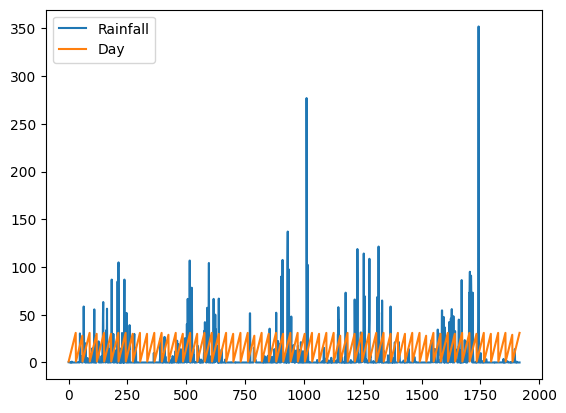

In [55]:
df [['Rainfall','Day']].plot()

In [56]:
nan_values = df.isna().sum()

print(nan_values)

year                0
Month               0
Day                 0
Mean_Windspeed      0
Wind_Direction      0
Mean_Tempurature    0
Humidity            0
Rainfall            0
Duration            0
Color               0
Flood               0
Date                0
dtype: int64


In [15]:

# Split the data into train and test sets
X = df[['date', 'mean_windspeed', 'wind_direction', 'mean_tempurature', 'humidity', 'duration','rainfall']]
y = df['flood']

print('Print X')
print(X)

print('Print y')
print(y)


Print X
           date  mean_windspeed  wind_direction  mean_tempurature  humidity  \
0    2019-01-01             8.5            60.0              12.1      69.0   
1    2019-01-02             8.5            70.0              13.2      67.0   
2    2019-01-03             7.9            70.0              13.7      82.0   
3    2019-01-04             5.0            90.0              19.1      81.0   
4    2019-01-05             1.0           290.0              19.2      88.0   
...         ...             ...             ...               ...       ...   
1912 2024-03-27            16.1            90.0              23.0      80.0   
1913 2024-03-28             4.4            80.0              24.8      80.0   
1914 2024-03-29             3.8           270.0              25.8      79.0   
1915 2024-03-30             5.6           180.0              26.6      78.0   
1916 2024-03-31             6.1           210.0              27.2      86.0   

      duration  rainfall  
0            0  

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X.drop(['date'], axis = 1), y, test_size=0.2, random_state=42)


In [18]:
# Select a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.2796929185336066


In [20]:
# Predict rainfall for new data points
# For example:
new_data = pd.DataFrame({
    'mean_windspeed' : [10, 23, 23, 224, 34] 
    ,'wind_direction' : [100, 124, 134, 253, 56]
    ,'mean_tempurature': [25, 34, 45, 56, 77]
    ,'humidity' : [60, 23, 56, 77, 88]
    ,'duration' : [1160, 203, 556, 177, 10]
    ,'rainfall' : [124, 46, 70, 21, 0.5]
    })
predicted_rainfall = model.predict(new_data)
print(predicted_rainfall)

[76.20427204 30.96410989 48.05637893 22.63611715 22.40573498]


In [21]:
import pickle

In [22]:
# loading the saved model
filename = 'data/models/flood_forecast_model_SK.sav'
pickle.dump(model, open(filename, 'wb'))

In [23]:
# loading the saved model
loaded_model = pickle.load(open('data/models/flood_forecast_model_SK.sav', 'rb'))

In [24]:
input_data = {
    'mean_windspeed' : [10, 23, 23, 224, 34] 
    ,'wind_direction' : [10, 124, 134, 253, 56]
    ,'mean_tempurature': [25, 34, 45, 56, 77]
    ,'humidity' : [60, 23, 56, 77, 88]
    ,'duration' : [116, 203, 556, 177, 10]
    ,'rainfall' : [14, 46, 70, 21, 0.5]
    }

new_data = pd.DataFrame(input_data)
predicted_rainfall = loaded_model.predict(new_data)
print('Predicted Flood:', predicted_rainfall)

Predicted Flood: [25.80363893 30.96410989 48.05637893 22.63611715 22.40573498]
